<a href="https://colab.research.google.com/github/eildes06/Machine-Learning/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_emine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

- In this project we made image classification with CNN  of Fashion MNIST data set. 
- We have 10 classes here.

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

In [2]:
np.set_printoptions(suppress=True) # this code to fix e values of output

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

- it is a ready data from keras, we load it from there.

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


- we see our data has 60000 image for traning also 10000 data for test.

- Below you see shape of class 5

In [6]:
x_train[5].shape

(28, 28)

In [8]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

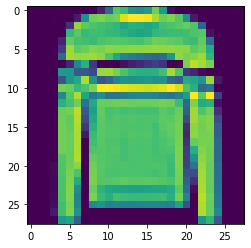

In [9]:
plt.imshow(x_train[5])

In [10]:
y_train[5]

2

In [11]:
y_train.shape

(60000,)

- below there is uniques values of y_train for each class

In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [13]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
classes[int(y_train[0])]   

'Ankle boot'

In [15]:
int(np.random.randint(low=0, high=50000, size=1))   

25259

In [16]:
x_train[int(np.random.randint(low=0, high=50000, size=1))]

array([[  0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  16,  71,  73,
         78,  77,  74,  99,   0,   0,   1,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   3,   0,   4, 122,  92, 104,
         85, 101, 180, 208, 115,   0,   1,   5,   1,   1,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   1,   2,   1,   0,   0,  87, 164,  75,  55,
        130, 113,  57,   0,  42,   0,   0,   0,   0,   2,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  15,  78, 198, 208, 199, 215,
        185, 194, 174, 112, 156, 184, 126,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   0,   0, 139, 196, 216, 203, 201, 184, 192,
        178, 180, 219, 219, 206,  37, 187, 210, 180,  59,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0, 112, 219, 199, 210, 208, 215, 206, 210,
        125, 151, 192, 116,  80, 162, 206, 181, 202, 155,   0,   0,   0,
          0,   0],
       [  

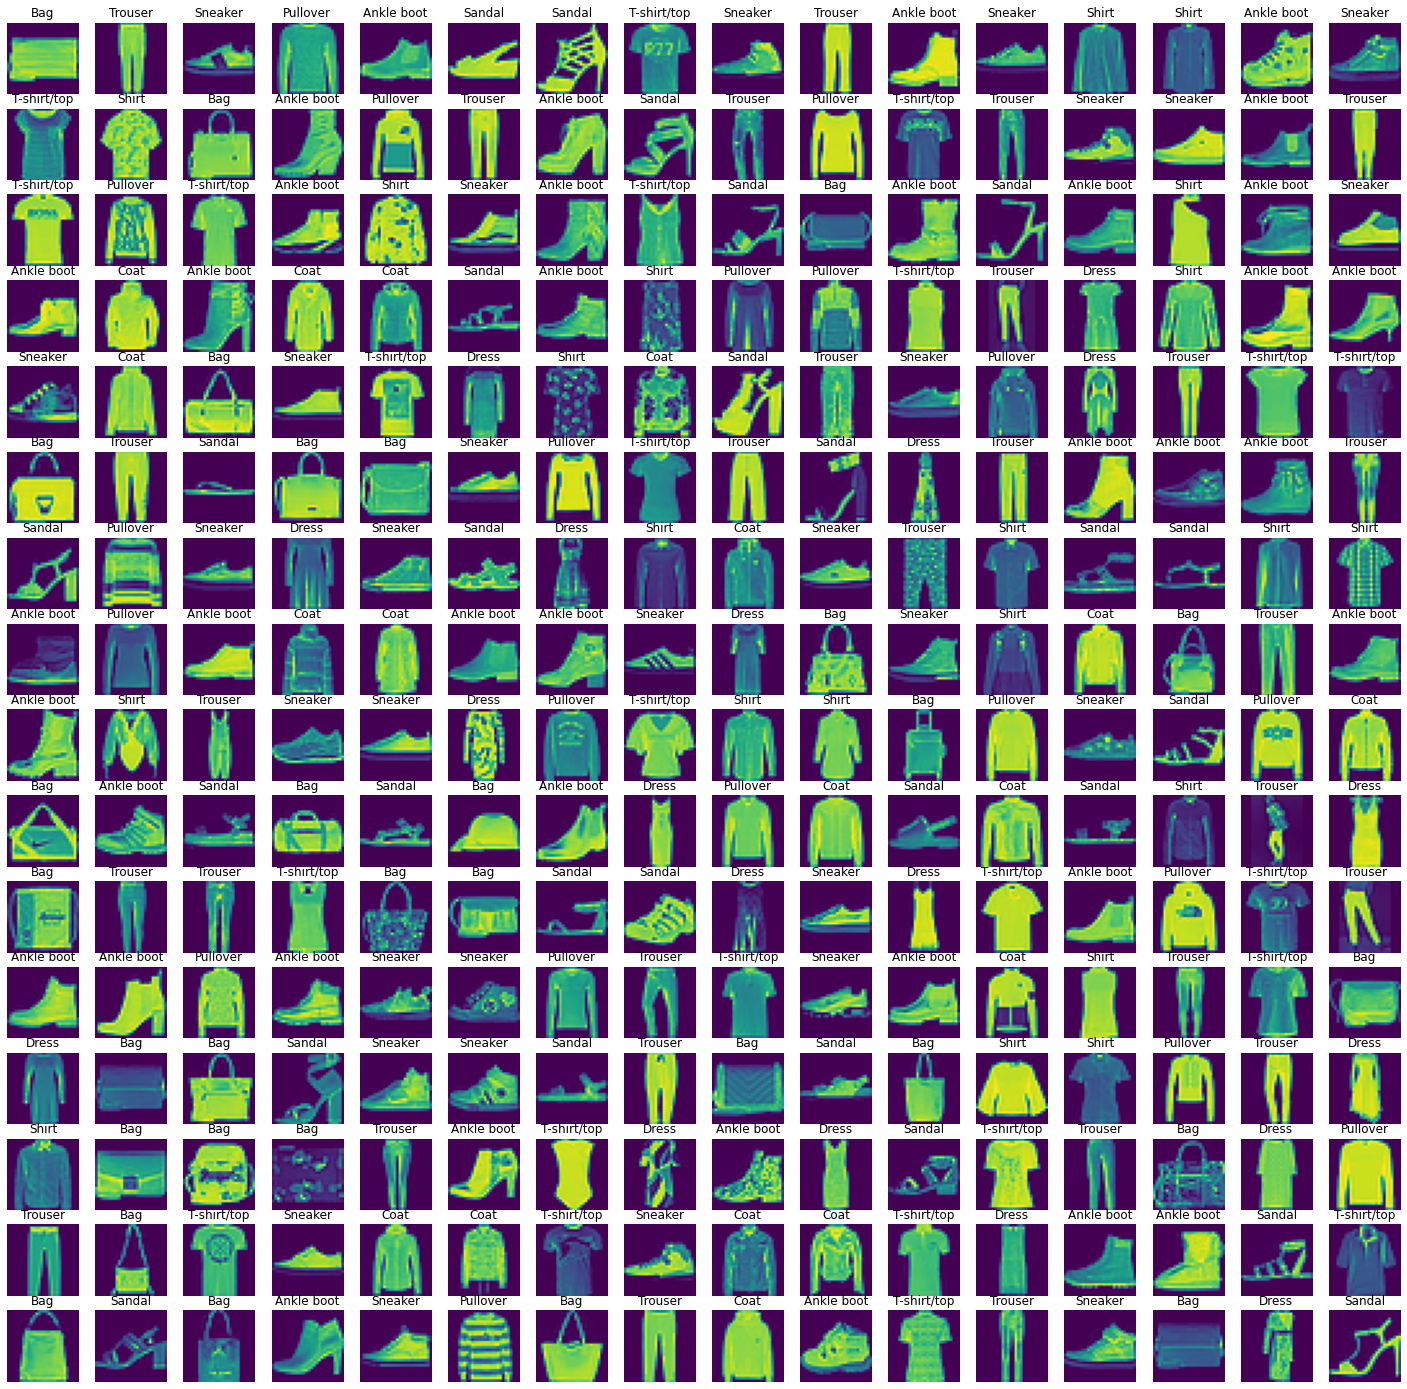

In [17]:
plt.figure(figsize=(25, 25))
for i in range(256):                                               
    rand_index = int(np.random.randint(low=0, high=50000, size=1)) 
    plt.subplot(16, 16, i+1)                                       
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])                   
    plt.imshow(x_train[rand_index])  

-we looked images randomly. 

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [18]:
x_train[5].min()

0

In [19]:
x_train[5].max()

255

In [20]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255                     
x_test /= 255

In [21]:
x_train[5].min()    

0.0

In [22]:
x_train[5].max()    

1.0

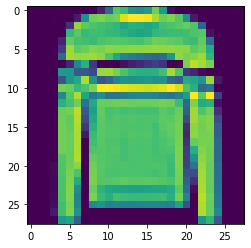

In [23]:
plt.imshow(x_train[5]) 

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [24]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

- we made to categorical to our y_train, y_test. If we didnt do this Dl wont undertsand type of our data.

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape   

(10000, 10)

In [28]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

- we created our model of sequential according to projects wishes :) 

In [61]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 

model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1))) 
# stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 17500)             0         
                                                                 
 dense_9 (Dense)             (None, 128)               2240128   
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
____________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

- we made earlyStop to avoid overfit.

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [63]:
model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.3846 - accuracy: 0.8654 - val_loss: 0.3043 - val_accuracy: 0.8921
Epoch 2/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.2533 - accuracy: 0.9104 - val_loss: 0.2946 - val_accuracy: 0.8954
Epoch 3/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.2185 - accuracy: 0.9221 - val_loss: 0.2665 - val_accuracy: 0.9078
Epoch 4/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1920 - accuracy: 0.9326 - val_loss: 0.2956 - val_accuracy: 0.9053
Epoch 5/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1709 - accuracy: 0.9397 - val_loss: 0.3469 - val_accuracy: 0.9032


In [64]:
model.metrics_names

['loss', 'accuracy']

In [65]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.384599,0.865400,0.304318,0.8921
1,0.253302,0.910383,0.294610,0.8954
2,0.218509,0.922100,0.266523,0.9078
3,0.192025,0.932567,0.295560,0.9053
4,0.170917,0.939683,0.346854,0.9032


- our values are good 
- there is no overfit here.

**TASK 7: Plot values of metrics you used in your model.**

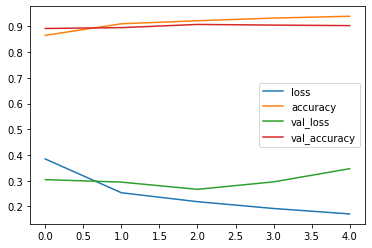

In [66]:
summary.plot();

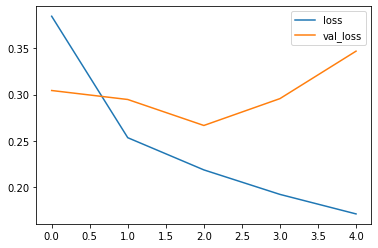

In [67]:
summary[["loss", "val_loss"]].plot();

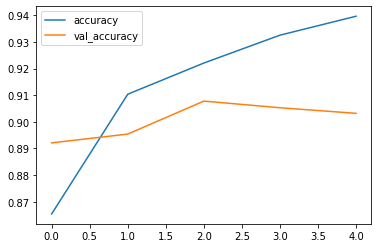

In [68]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [69]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [70]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2665 - accuracy: 0.9078


[0.2665226459503174, 0.907800018787384]

In [72]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2665226459503174
Test accuracy: 0.907800018787384


In [74]:
pred_prob = model.predict(x_test)
pred_prob

array([[0.00000029, 0.        , 0.00000012, ..., 0.00046295, 0.00000058,
        0.9994398 ],
       [0.00000077, 0.        , 0.99999607, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00000012, 0.        , 0.00000005, ..., 0.0000001 , 0.9999887 ,
        0.        ],
       [0.00000015, 0.99999094, 0.00000001, ..., 0.        , 0.00000001,
        0.00000003],
       [0.00076167, 0.00011326, 0.00253916, ..., 0.0245664 , 0.00736955,
        0.02753853]], dtype=float32)

In [75]:
pred_prob.shape

(10000, 10)

In [76]:
pred_prob[0]

array([0.00000029, 0.        , 0.00000012, 0.00000006, 0.0000009 ,
       0.00009393, 0.00000138, 0.00046295, 0.00000058, 0.9994398 ],
      dtype=float32)

In [77]:
np.argmax(pred_prob[0])

9

In [78]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [79]:
y_pred.shape

(10000,)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1000
           1       1.00      0.97      0.98      1000
           2       0.90      0.78      0.84      1000
           3       0.91      0.92      0.91      1000
           4       0.79      0.90      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.74      0.76      0.75      1000
           7       0.97      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [81]:
print(confusion_matrix(y_test, y_pred))

[[862   0  10  16   7   2 100   0   3   0]
 [  1 973   2  17   2   0   5   0   0   0]
 [ 17   1 781   7 120   1  73   0   0   0]
 [  9   2   8 916  33   0  32   0   0   0]
 [  1   1  26  22 898   0  51   0   1   0]
 [  0   0   0   0   0 974   0  16   0  10]
 [ 89   0  42  27  79   0 756   0   7   0]
 [  0   0   0   0   0   7   0 959   0  34]
 [  0   0   0   4   3   2   7   4 980   0]
 [  0   0   0   0   0   6   1  14   0 979]]


- We dont have enough domain knowledge 
- There are some parts that our model made mistake to prediction
- Finally our scores are good

In [82]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [83]:
(y_test != y_pred).sum()

922

## Prediction

In [85]:
my_number = x_test[3]

In [86]:
my_number.shape

(28, 28)

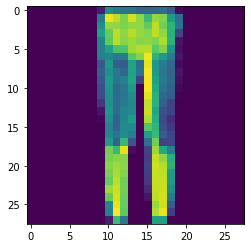

In [87]:
plt.imshow(my_number.reshape(28,28));

In [88]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

array([[0.00000004, 0.99999726, 0.00000001, 0.00000209, 0.00000054,
        0.        , 0.00000002, 0.        , 0.        , 0.        ]],
      dtype=float32)

In [89]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [90]:
model.save("cnn-1.h5")

In [91]:
model=tf.keras.models.load_model('cnn-1.h5')

In [92]:
pred=model.predict(np.expand_dims(x_test[5],axis=0))

In [93]:
np.argmax(pred)

1

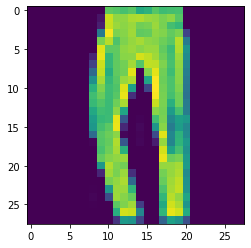

In [95]:
plt.imshow(x_test[5].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___